<a href="https://colab.research.google.com/github/sskim0126/etc/blob/master/%E1%84%80%E1%85%B5%E1%86%B7%E1%84%89%E1%85%A5%E1%86%BC%E1%84%89%E1%85%B5%E1%86%A8_20171595.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 숙제 1

#### 20171595 김성식
---

### 1. [PyTorch Framework Tutorial] 다음 링크를 직접 수행하고, 결과를 첨부하세요. (20점)

#### (1) 코드의 해석/주석과 결과의 의미를 간결하고 간단하게 작성하세요.

* tensor
    * https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

In [1]:
import torch
import numpy as np

In [2]:
#
# Tensor 초기화하기
#
# 입력 데이터
data = [[1, 2], [3, 4]]
# 이를 torch에서 사용하는 tensor로 변환
x_data = torch.tensor(data)

In [3]:
# tensor는 numpy 배열로부터도 생성 가능하다.
# numpy array 생성
np_array = np.array(data)
# 이를 torch의 tensor로 변환하는 torch.from_numpy()
x_np = torch.from_numpy(np_array)

In [4]:
# 다른 텐서로부터 새로운 텐서 생성
# 명시적으로 재정의 하지 않는다면 shape, datatype은 유지된다.
# ones_like는 입력받은 텐서와 shape, datatype은 유지하면서 모든 원소가 1인 텐서 생성
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

# rand_like는 입력받은 텐서와 shape, datatype은 유지하면서 모든 원소를 랜덤하게 뽑은 텐서 생성
# 여기서는 dtype을 float로 명시했기 때문에 dtype이 바뀜
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9462, 0.6642],
        [0.3502, 0.9202]]) 



In [5]:
# tensor의 차원을 나타내는 튜플을 입력으로 하여
# 특정 차원의 텐서를 만들어 낼 수 있다.
shape = (2,3,)
# rand는 0과 1사이의 무작위값
rand_tensor = torch.rand(shape)
# ones는 1
ones_tensor = torch.ones(shape)
# zeros는 0으로 값을 채운다.
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9220, 0.1091, 0.4774],
        [0.2357, 0.1778, 0.5378]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
#
# Tensor의 속성
#
# [3,4] 차원의 0~1사이의 랜덤값으로 채운 텐서 생성
tensor = torch.rand(3,4)

# shape는 tensor의 모양(차원)
print(f"Shape of tensor: {tensor.shape}")
# dtype은 tensor의 자료형
print(f"Datatype of tensor: {tensor.dtype}")
# device는 tensor가 어느 장치에 저장되는지를 나타낸다.
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
# 
# Tensor 연산
#
# cuda가 현재 사용 가능중인지 확인
if torch.cuda.is_available():
    # 가능하다면 tensor의 device cuda(GPU)로 옮김
    tensor = tensor.to('cuda')

In [8]:
# Numpy style의 indexing과 slicing
# [4,4]크기의 1로 채운 텐서 생성
tensor = torch.ones(4, 4)
# 1번째 열을 0으로 초기화한다.
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
# torch.cat은 여러 tensor를 주어진 차원에 따라 하나의 tensor로 연결할 수 있다.
# dim=0일 경우 첫번째 차원, dim=1일 경우 두번째 차원에 따라 연결한다.
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [10]:
# tensor.mul: element-wise(hadamard) product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# '*'도 같은 의미, 다른 문법
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# tensor.matmul: matrix multiplication
# T: Transpose
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# '@': 같은 의미, 다른 문법
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [12]:
# _로 끝나는 연산은 해당 tensor를 변경하는 in-place 연산을 의미
print(tensor, "\n")
# add_(5)는 tensor의 모든 값에 5만큼 더하고 이를 저장하겠다는 의미
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [13]:
#
# Numpy 변환
#
# tensor를 numpy array로 변환
# 5차원의 1로 채운 텐서 생성
t = torch.ones(5)
print(f"t: {t}")
# numpy()는 tensor를 numpy array로 변환해줌
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
# tensor를 변경하면 numpy array에 반영된다.
# CPU상의 tensor와 numpy array는 메모리 공간을 공유하기 떄문에
# 하나를 변경하면 다른 하나도 변경된다.
# tensor의 모든 원소에 1을 더함
t.add_(1)
print(f"t: {t}")
# numpy array를 출력하면 마찬가지로 1만큼 더해짐
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
# numpy array를 tensor로 변환
# 5차원의 1로 채워진 numpy array 생성
n = np.ones(5)
# from_numpy()로 torch tensor로 변환
t = torch.from_numpy(n)

In [16]:
# 마찬가지로 numpy array를 변경해도 tensor에 반영된다.
# in-place 연산을 위해 out=n으로 설정
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


* torch.autograd
    * https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py
    * torch.autograd는 신경망 학습을 지원하는 pytorch의 자동 미분 엔진

In [17]:
#
# pytorch에서의 사용법
#
import torch, torchvision
# model은 pretrained된 resnet18을 사용
model = torchvision.models.resnet18(pretrained=True)
# [1,3,64,64] 차원의 랜덤값 텐서인 입력 데이터 생성
# channel이 3, width, height가 64인 입력 한개로 보면 됨
data = torch.rand(1, 3, 64, 64)
# [1,1000] 차원의 랜덤값 텐서인 lable 생성
# 1000 차원인 이유는 resnet18의 출력이 1000차원이기 때문
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [18]:
# model의 forward(순전파) 단계
prediction = model(data)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [19]:
# model의 backward(역전파) 단계
# loss는 forward한 예측값과 label을 뺀 값의 총합
loss = (prediction - labels).sum()
# 오차 tensor에 backward()를 호출하면 역전파가 시작
# autograd가 parameter의 .grad에 gradient를 계산하고 저장
loss.backward()
loss

tensor(-509.6700, grad_fn=<SumBackward0>)

In [20]:
# optimizer는 SGD로 정의
# learning rate는 0.01, momentumdms 0.9로 설정
# model.parameters()를 인자로 넣어 모델의 모든 매개변수를 optimizer에 등록
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [21]:
# step()을 호출하면 optimizer가 gradient descent를 시작한다.
# .grad에 저장된 gradient에 따라 각 parameter를 조정한다.
optim.step()

In [22]:
#
# Autograd에서 미분
#
import torch

# 2개의 값을 갖는 2개의 tensor 생성
# requires_grad=True는 autograd한테 모든 연산들을 추적해야 한다고 알려준다.
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

$$Q = 3a^3 - b^2$$

In [23]:
# a와 b로부터 새로운 tensor Q를 만든다.
Q = 3*a**3 - b**2

Q의 a와 b에 대한 gradient는 다음과 같다.
$$\frac{\partial Q}{\partial a} = 9a^2$$
$$\frac{\partial Q}{\partial b} = -2b$$
backward()를 호출할 때 upstream gradient를 명시적으로 전달해야 한다.
자기 자신에 대한 gradient는 1이므로 1을 전달한다.

In [24]:
# external_grad(upstream gradient)는 자신에 대한 미분값이므로 1로 설정
external_grad = torch.tensor([1., 1.])
# upstream gradient를 집어넣은 후 backward 수행
Q.backward(gradient=external_grad)

In [25]:
# backward를 수행한 결과는 a.grad, b.grad에 저장된다.
# a.grad와 b.grad가 직접 구한 미분값과 같은지 확인
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [26]:
#
# DAG(Dynamic Acyclic Graph)에서 제외하기
#
# x,y,z는 모두 [5,5]의 랜덤 텐서
# z만 requires_grad를 True로 설정
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

# 입력 텐서들이 모두 requires_grad=False인 경우
# 출력 텐서도 requires_grad=False이다.
a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
# 입력 텐서들이 하나라도 requires_grad=True인 경우
# 출력 텐서는 requires_grad=True이다.
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [27]:
# DAG에서 제외돼서 변화도를 계산하지 않는 parameter를 frozen parameter라고 한다.
# 신경망 내에서 일부 parameter가 변화할 필요가 없다고 판단하면 이를 freeze하는 것이 유용
# 이러한 케이스 중 하나는 transfer learning
# pretrained model을 finetune할 때 일반적으로 FC layer만 변경
from torch import nn, optim

# pretrained resnet model
model = torchvision.models.resnet18(pretrained=True)

# model의 모든 parameter를 고정(freeze)
for param in model.parameters():
    # requires_grad=False로 설정함으로써 grad 계산을 안함
    param.requires_grad = False

In [28]:
# fc layer만 고정되지 않은 새로운 선형 계층으로 대체
model.fc = nn.Linear(512, 10)

In [29]:
# optimizer에 모든 parameter를 인자로 넣어도
# requires_grad=True인 model.fc의 가중치만 변화도를 계산한다.
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

#### (2) 다음 설명의 주요 함수/API 작성하세요.

1) **torch.rand()**: Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)

2) **torch.zeros()**: Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument size.

3) **torch.tensor()**: Constructs a tensor with data.

4) **torch.from_numpy()**: Creates a Tensor from a numpy.ndarray.

5) **torch.as_tensor()**: Convert the data into a torch.Tensor.

6) **torch.cat()**: Concatenates the given sequence of seq tensors in the given dimension.

7) **torch.stack()**: Concatenates sequence of tensors along a new dimension.

8) **torch.eye()**:  Returns a 2-D tensor with ones on the diagonal and zeros elsewhere.

9) A tensor can be created with **(requires_grad=True)** so that torch.autograd records operations on them for automatic differentiation.

10) **torch.autograd.backward()**: Computes the sum of gradients of given tensors w.r.t. graph leaves. The graph is differentiated using the chain rule. If any of tensors are non-scalar (i.e. their data has more than one element) and require gradient, then the Jacobian-vector product would be computed, in this case the function additionally requires specifying grad_tensors. It should be a sequence of matching length, that contains the “vector” in the Jacobian-vector product, usually the gradient of the differentiated function w.r.t. corresponding tensors (None is an acceptable value for all tensors that don’t need gradient tensors).
This function accumulates gradients in the leaves - you might need to zero .grad attributes or set them to None before calling it. See Default gradient layouts for details on the memory layout of accumulated gradients.

11) **torch::autograd::grad**: Computes and returns the sum of gradients of outputs w.r.t. the inputs. grad_outputs should be a sequence of length matching output containing the “vector” in Jacobian-vector product, usually the pre-computed gradients w.r.t. each of the outputs. If an output doesn’t require_grad, then the gradient can be None).
If only_inputs is True, the function will only return a list of gradients w.r.t the specified inputs. If it’s False, then gradient w.r.t. all remaining leaves will still be computed, and will be accumulated into their .grad attribute.

12) **torch.norm()**: Returns the matrix norm or vector norm of a given tensor.

13) **torch.no_grad()**: Context-manager that disabled gradient calculation. Disabling gradient calculation is useful for inference when you are sure that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.
In this mode, the result of every computation will have requires_grad=False, even when the inputs have requires_grad=True. This mode has no effect when using enable_grad context manager. This context manager is thread local; it will not affect computation in other threads.
Also functions as a decorator. (Make sure to instantiate with parenthesis.)

14) **torch.Tensor.detech**: Returns a new Tensor, detached from the current graph. The result will never require gradient

#### (3) 다음 주어진 x 값을 토대로 아래의 문제를 수행하세요.

In [30]:
# [5,4] 사이즈의 랜덤 텐서 생성
x = torch.rand(5, 4)
x

tensor([[0.6477, 0.3449, 0.3573, 0.5479],
        [0.7038, 0.1638, 0.3063, 0.7877],
        [0.5677, 0.2352, 0.8005, 0.2800],
        [0.5425, 0.3090, 0.8132, 0.7175],
        [0.3159, 0.4175, 0.4862, 0.8800]])

1) x의 shape를 구하세요.

In [31]:
print(x.shape)

torch.Size([5, 4])


2) x의 행렬에서 3열을 indexing을 사용해서 출력하세요.

In [32]:
print(x[:,2])

tensor([0.3573, 0.3063, 0.8005, 0.8132, 0.4862])


3) x를 (2, 10)의 크기로 바꾸는 메소드를 사용하여 크기를 변경한 후 출력하세요.

In [33]:
x = x.reshape([2, 10])
print(x)

tensor([[0.6477, 0.3449, 0.3573, 0.5479, 0.7038, 0.1638, 0.3063, 0.7877, 0.5677,
         0.2352],
        [0.8005, 0.2800, 0.5425, 0.3090, 0.8132, 0.7175, 0.3159, 0.4175, 0.4862,
         0.8800]])


4) x를 cuda 장치 객체로 변경하세요.

In [34]:
if torch.cuda.is_available():
    x = x.to('cuda')
print(x.device)

cuda:0


#### (4) 다음 예측값과 실제값이 주어졌을 때, 교차 엔트로피 손실함수를 구하세요.
예측값: 𝑦̂=[0.57,0.05,0.14,0.10,0.14], 실제값: 𝑦=[1,0,0,0,0]

In [35]:
# predict, y_label을 python list로 작성
predict = [[0.57, 0.05, 0.14, 0.10, 0.14]]
y_label = [[1, 0, 0, 0, 0]]

1) numpy로 구현하여 계산하세요.

In [36]:
# predict, y_label을 numpy array로 변환
predict_np = np.array(predict)
y_label_np = np.array(y_label)

# log에 0이 들어가는 것을 방지하기 위한 매우 작은 값
eps = 1e-10

# cross entropy loss는 prediction에 y_label을 곱하고 negative를 씌운 것의 합
ce = np.sum(-1 * y_label_np * np.log(predict_np))
print(ce)

0.5621189181535413


2) PyTorch로 구현하여 계산하세요. (hint: torch의 loss 함수 사용)

In [37]:
# 소수 6번째자리까지 출력
torch.set_printoptions(precision=6)

# predict, y_label을 torch tensor로 변환
predict_torch = torch.tensor(predict)
# NLLLoss를 사용하기 위해서는 정답 label의 index를 넣어주어야 함
# 0번째 값이 1이기 때문에 정답으로 [0]을 넣어줌
y_label_torch = torch.tensor([0])

# log에 0이 들어가는 것을 방지하기 위한 매우 작은 값 
eps = 1e-10

# loss는 negative log likelihood loss로 정의
# NLLLoss의 이름에 log가 포함되어 있지만
# torch documentation을 보니까 log는 씌우지 않고 log를 씌웠다고 가정하고 정답 클래스에서의 값에 negative만 수행함
loss = nn.NLLLoss()
# 따라서 torch.log를 통해 prediction 값에 log 연산을 수행
ce = loss(torch.log(predict_torch + eps), y_label_torch)
print(ce)

##############################
# torch.nn.CrossEntropyLoss도 있지만
# 이 기능은 nn.LogSoftmax와 nn.NLLLoss를 합친 것이라고 합니다.
# 하지만 저는 예측값이 이미 softmax를 거친 확률값이라고 판단했고 (모든 값이 0과 1 사이고 총 합이 1이기 때문에)
# 따라서 해당 기능을 사용하지 않는 방식으로 구현하였습니다.
# CrossEntropyLoss과정이 Softmax -> Log -> NLLLoss 순으로 진행되기 떄문에
# 이미 Softmax는 거쳤기 때문에 log -> NLLLoss 과정만 구현하는 것으로 교차 엔트로피 손실을 구했습니다.
##############################

tensor(0.562119)


### 2. [선형회귀] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (17점)
(코드의 해석과 결과의 의미를 작성하세요.)

In [38]:
# 관련 라이브러리
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

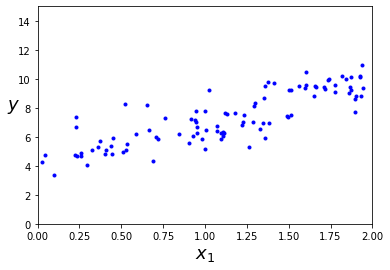

In [39]:
# 입력값은 0~2사이의 랜덤값
X = 2 * np.random.rand(100, 1)
# y = 4 + 3x + (표준정규분포에서 뽑은 랜덤값)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.axis([0, 2, 0, 15])
plt.show()
#(1) 화면 출력 확인
# x가 증가함에 따라 y도 선형적으로 증가하는 추세를 보임

* 선형회귀에서의 해석해 w는 다음과 같다.
$$ w = (X^T X)^{-1}X^T y$$

In [40]:
### 정규 방정식을 사용한 선형회귀 접근 ###
# bias term 추가를 위해 값이 무조건 1인 입력값 추가
X_b = np.c_[np.ones((100, 1)), X]
# 선형회귀에서의 해석해를 구함
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
# (2) theta_best 출력 확인
# 출력은 해석해를 통해 최적화된 가중치를 의미
# 원하는 결과는 bias는 4, 기울기는 3
print(theta_best)

[[4.1558175 ]
 [2.82930983]]


In [41]:
# 입력값: 0, 2
# 원하는 출력값: 4+3*0=4, 4+3*2=10
X_new = np.array([[0], [2]])
# bias term 추가
X_new_b = np.c_[np.ones((2, 1)), X_new]
# 해석해를 통해 구한 가중치와 입력값을 곱함
y_predict = X_new_b.dot(theta_best)
# (3) y_predict 출력 확인
# 출력값은 선형회귀를 통해 구한 모델에 새로운 입력값이 들어왔을 경우의 출력을 나타냄
print(y_predict)

[[4.1558175 ]
 [9.81443717]]


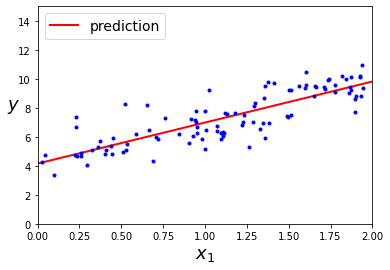

In [42]:
# 구한 직선을 그래프로 그림
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction") 
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
   
plt.show()
#(4) 화면 출력 확인
# 출력은 데이터에 fit하는 선형회귀 모델을 그린 것

In [43]:
# python scikit-learn library를 통한 linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# (5) lin_reg.intercept_, lin_reg.coef_ 출력 확인
# 출력값은 sklearn 라이브러리가 제공하는 함수를 통해 구한 가중치
print(lin_reg.intercept_, lin_reg.coef_)

[4.1558175] [[2.82930983]]


In [44]:
# (6) lin_reg.predict(X_new) 출력 확인
# 출력값은 새로운 입력에 대한 모델의 출력이다.
print(lin_reg.predict(X_new))

[[4.1558175 ]
 [9.81443717]]


In [45]:
# numpy.linalg.lstsg(least square)는 최소제곱해를 반환하는 함수
# X.T*W = y가 있을 때 X, y를 주면 |y - X.T*W|^2가 최소가 되는 해를 근사해서 출력
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
# (7) theta_best_svd 출력 확인
# 결과값은 lstsq() 함수를 통해 구한 가중치
print(theta_best_svd)

[[4.1558175 ]
 [2.82930983]]


In [46]:
# numpy.linalg.pinv()는 정사각행렬이 아닌 행렬에서도 역행렬을 정의하는 Moore-Penrose의 pseudo inverse matrix를 구현한 함수
# X.T*W = y가 있을 경우 X는 정사각행렬이 아니기 때문에 역행렬을 정의할 수 없지만,
# pseudo inverse matrix를 구해 양변에 곱하면
# X^(-1)*X.T*W = X^(-1)*y => W = X^(-1)*y가 된다.
# (8) np.linalg.pinv(X_b).dot(y) 출력 확인
# pinv()를 통해 구한 유사 역행렬을 y에 곱함으로써도 선형회귀의 가중치를 구할 수 있다.
print(np.linalg.pinv(X_b).dot(y))

[[4.1558175 ]
 [2.82930983]]


* 경사 하강법을 위해서는 loss function을 정의하고 gradient를 구해야 한다.
$$ L = \frac{1}{m}\sum(XW - y)^2$$
$$ \frac{\partial L}{\partial W} = \frac{2}{m}X(XW - y) $$

In [47]:
### 경사 하강법을 사용한 선형회귀 접근 ### 
# learning rate는 0.1로 설정
eta = 0.1
n_iterations = 1000
m = 100
# 초기 가중치는 랜덤하게 설정
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    # 위에서 구한 식으로 반복해서 gradient 계산
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    # gradient에 learning rate를 곱한 만큼 가중치를 descent 한다.
    theta = theta - eta * gradients
# (9) theta 출력 확인
# 출력값은 학습을 통해 얻은 가중치
print(theta)

[[4.1558175 ]
 [2.82930983]]


In [48]:
# (10) X_new_b.dot(theta) 출력 확인
# 출력값은 gradient descent를 통해 얻은 모델로 새로운 입력값에 대한 계산한 값
print(X_new_b.dot(theta))

[[4.1558175 ]
 [9.81443717]]


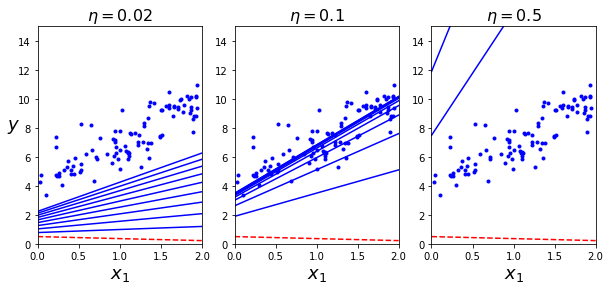

In [49]:
# learning rate에 따른 수렴속도 비교
# 현재는 모든 데이터에서 loss를 구하고 gd를 진행하는 batch gradient descent 사용
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    # m = full batch size
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        # 초기 10번에 대해서 그래프를 그림
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            # 제일 처음은 빨간색 점선 그 이후는 파란색 선
            style = "b-" if iteration > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        # 훈련 데이터의 모든 값을 사용해서 gradient를 구함
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        # 입력으로 주어진 learning rate에 따라 gd를 진행한다.
        theta = theta - eta * gradients

        if theta_path is not None: 
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
# learning rate가 0.02, 0.1, 0.5인 경우로 gd를 수행하고 그래프를 그림
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
# learning rate가 0.1일 때의 것을 캐싱
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()
# (11) 화면 출력 확인
# learning rate에 따른 수렴 과정
# 0.02일 때는 비교적 느린 수렴 속도
# 0.1일때는 비교적 적당
# 0.5일 때는 발산하는 듯한 모습

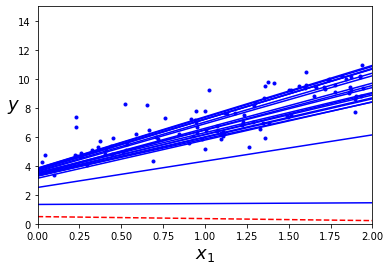

In [50]:
### 스토캐스틱 경사 하강법을 사용한 선형회귀 접근 ### 
# sgd는 1개의 데이터에 대해서 Loss를 구하고 gd를 진행
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
# 초기 learning rate = 0.1
t0, t1 = 5, 50
# learning rate를 시간이 지남에 따라 감소시키기 위한 함수
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) 
for epoch in range(n_epochs):
    # full batch의 size만큼 순회하면서 매번 gd를 진행
    for i in range(m):
        # 초기 20번에 대해서 그래프를 그림 (빨간색은 제일 처음)
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        # m 크기의 dataset에서 random한 index 선택
        random_index = np.random.randint(m)
        # 해당 index의 데이터와 label rkwudha
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1]
        # 데이터 하나에 대해서 gradient 계산
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # iteration이 반복할수록 learning rate decay
        eta = learning_schedule(epoch * m + i) 
        # gradient descent
        theta = theta - eta * gradients 
        theta_path_sgd.append(theta)
plt.plot(X, y, "b.") 
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.axis([0, 2, 0, 15])
plt.show()
# (12) 화면 출력 확인
# sgd가 수렴하는 과정
# 수렴하긴 하지만 그래도 흔들리는 듯해 보임

In [51]:
# (13) theta 출력 확인
# sgd를 통해 얻은 가중치
print(theta)

[[4.19693867]
 [2.79242189]]


In [52]:
# scikit-learn library에도 SGD Regressor를 제공
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
# (14) sgd_reg.fit(X, y.ravel()) 출력 확인
# library를 이용한 sgd
print(sgd_reg.fit(X, y.ravel()))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [53]:
# (15) sgd_reg.intercept_, sgd_reg.coef_ 출력 확인
# sklearn에서의 SGD를 수행한 가중치
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.15813598] [2.85158361]


In [54]:
### 미니배치 경사 하강법을 사용한 선형회귀 접근 ###
# minibatch gradient descent는 bgd와 sgd의 중간
# 미리 정해준 사이즈의 minibatch 만큼의 데이터를 본 후 loss를 구하고 gradient descent를 진행
theta_path_mgd = []
n_iterations = 50
# 여기서는 minibatch의 사이즈는 20
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)
# 초기 learnin rate = 0.2
t0, t1 = 200, 1000
# learning rate decay function
def learning_schedule(t):
    return t0 / (t + t1)
t=0
for epoch in range(n_iterations):
    # m 크기의 dataset를 shuffle
    shuffled_indices = np.random.permutation(m) 
    X_b_shuffled = X_b[shuffled_indices] 
    y_shuffled = y[shuffled_indices]
    # shuffle된 dataset에서 20(=minibatch size)개씩 데이터를 읽으면서 gd를 진행
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        # 20개의 데이터에 대해서 gradient를 구함
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        # learning rate decay
        eta = learning_schedule(t)
        # gradient descent
        theta = theta - eta * gradients 
        theta_path_mgd.append(theta)
# (16) theta 출력 확인
# 출력값은 mgd를 통해 구한 가중치
print(theta)

[[4.02542157]
 [2.69629327]]


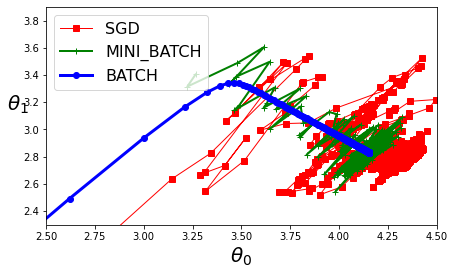

In [55]:
# bgd, sgd, mgd의 수렴 과정 시각화
theta_path_bgd = np.array(theta_path_bgd) 
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH") 
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$ ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
# (17) 화면 출력 확인
# bgd는 안정적이지만 1번 갱신하기 위해 모든 데이터를 다 봐야 하기 때문에 비교적 느릴 것이다
# sgd는 불안정하지만 1번 갱신은 데이터 1개를 의미하기 때문에 매우 수렴속도가 빠를 것이다
# mgd는 sgd보다는 안정적이고 bgd보다는 빠를 것이다

### 3. 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (3점)
(코드의 해석과 결과의 의미를 작성하세요.)

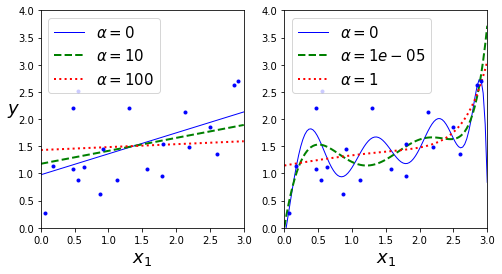

In [56]:
# 관련 라이브러리
from sklearn.linear_model import Ridge
#################################
# 아래 두 줄은 해당 class를 import하지 않으면 error가 발생해서
# 직접 작정한 코드입니다.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#################################

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() 
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new) 
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha)) 
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42) 
plt.show()
# 화면 출력 확인 및 결과 해석

### 4. [활성함수] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (3점)
(코드의 해석과 결과의 의미를 작성하세요.)

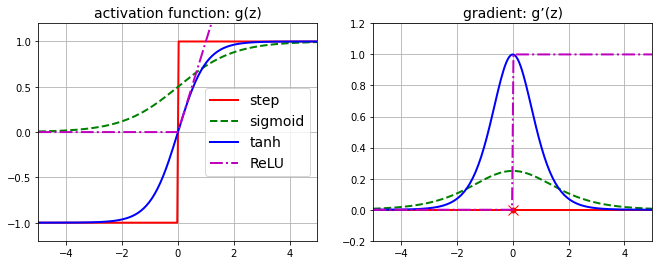

In [57]:
# 파이썬 2, 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 관련 라이브러리
import os
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# sigmoid
def logit(z):
    return 1 / (1 + np.exp(-z))

# relu
def relu(z):
    return np.maximum(0, z)

# (numerical) derivative
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))
plt.subplot(121)
# step function
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
# sigmoid
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid") 
# tanh
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
# ReLU
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU") 
plt.grid(True)
plt.legend(loc="center right", fontsize=14) 
plt.title("activation function: g(z)", fontsize=14) 
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
# derivative of step function
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step ") 
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
# derivative of sigmoid
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid")
# derivative of tanh
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh") 
# derivative of ReLU
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("gradient: g’(z)", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()
# 화면 출력 확인 및 각 활성함수의 특징을 비교 서술
# 1. step function
# 음수에서 -1, 양수에서 1인 간단한 함수
# activation을 이분법적으로 나눈 딱딱한 그래프를 보인다.
# 미분의 경우 0을 제외한 모든 영역에서 미분값이 0이고 0에서는 미분불가능하다.
# 2. sigmoid
# 음수에서 0, 양수에서 1로 수렴하며 0에서 부드럽게 이어지는 모습이다.
# zero-centered가 아니다.
# 미분의 경우 0에서 미분값이 0.25로 최고며 양 끝으로 갈 경우 gradient가 0으로 vanishing한다.
# 3. tanh
# sigmoid와 비슷한 모습의 그래프
# 다만 음수에서 -1, 양수에서 1로 수렴하며 zero-centered이다.
# 미분의 경우 sigmoid와 비슷하며 0에서 미분값이 1로 최고이다.
# 4. ReLU
# 음수에선 0, 양수에선 자기 자신값을 가진다.
# zero-centered가 아니다.
# 미분의 경우 음수에선 0, 양수에선 1로 gradient는 음수에선 vanishing하고 양수에선 vanishing하지 않는다.
# 0에서 미분불가능하다.

### 5. [probability] 직원이 A제조사로부터 1000개의 직접회로 (IC)를, B제조사로부터 2000개의 IC를, C 제조사로부터 3000개의 IC를 구매했다. IC의 불량 검사 결과, A사로부터 구매한 IC의 불량 확률은 0.05, B사로부터 구매한 IC의 불량 확률은 0.10, C사로부터 구매한 IC의 불량 확률은 0.10이었다. (4 점)

#### (1) 만약 3개의 제조사로부터 구매한 IC가 섞여 있는 경우, 임의로 선택한 IC가 불량일 확률은 얼마인가?

임의의 IC가 불량인 사건을 x, 제조사가 A,B,C인 사건을 각각 a,b,c라고 했을 경우 합규칙과 곱규칙에 의해 $$P(x) = \sum_y P(y,x) = P(a,x) + P(b,x) + P(c,x)$$로 정의할 수 있다. 
$$P(a,x) = P(x|a)P(a) = 0.05 * \frac{1000}{6000} = \frac{50}{6000}$$
$$P(b,x) = P(x|b)P(b) = 0.10 * \frac{2000}{6000} = \frac{200}{6000}$$
$$P(c,x) = P(x|c)P(c) = 0.10 * \frac{3000}{6000} = \frac{300}{6000}$$
$$P(x) = P(a,x) + P(b,x) + P(c,x) = \frac{50+200+300}{6000} = \frac{11}{120}$$

#### (2) 임의로 선택한 IC가 불량인 경우, 그것이 제조사 A로부터 만들어질 확률은 얼마인가?

임의로 선택한 IC가 불량인 경우 그것이 제조사 A로부터 만들어질 확률은 (1)문제에서 정의한 것에 따르면 $P(a|x)$로 표현할 수 있다.

조건부 확률은 다음과 같이 정의될 수 있다.
$$P(a|x) = \frac{P(a,x)}{P(x)}$$
$$P(a|x) = \frac{\frac{50}{6000}}{\frac{550}{6000}} = \frac{1}{11}$$

### 6. [probability] K대학은 대학원생보다 2배의 학부생이 재학중이다. 대학원생의 25%가 기숙사에 살고 있고, 학부생의 10%가 기숙사에 살고 있다. (4점)

#### (1) 한 학생을 임의로 선정한 경우, 그 학생이 기숙사에 살고 있는 학부생일 확률은 얼마인가?

학부생인 사건을 x, 기숙사에 사는 사건을 y라고 할 경우, 한 학생이 기숙사에 살고 있는 학부생인 사건의 확률은 $P(x,y)$이다.
$$P(x,y) = P(y|x)P(x) = 0.1 * \frac{1}{3} = \frac{1}{30}$$

#### (2) 기숙사에 살고 있는 한 학생을 임의로 선정한 경우, 그 학생이 대학원생일 확률은 얼마인가?

기숙사에 살고 있는 한 학생이 대학원생인 확률은 (1)에서 정의한 것에 따르면 $P(\neg{x}|y)$로 표현할 수 있다.

조건부 확률은 다음과 같이 정의될 수 있다.
$$P(\neg{x}|y) = \frac{P(\neg{x},y)}{P(y)}$$
합규칙과 곱규칙에 의하면
$$P(y) = P(x,y) + P(\neg{x},y) = P(y|x)P(x) + P(y|\neg{x})P(~x) = 0.1 * \frac{1}{3} + 0.25 * \frac{2}{3} = \frac{1}{5}$$
$$P(\neg{x}|y) = \frac{P(\neg{x},y)}{P(y)} = \frac{\frac{1}{6}}{\frac{1}{5}} = \frac{5}{6}$$

### 7. [probability] 다음의 확률 실험을 보고 물음에 답하세요. (4점)

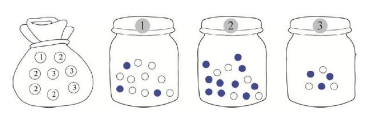

#### (1) 검은 공을 뽑을 확률을 구하세요.

주머니에서 1,2,3 구슬을 뽑을 사건을 각각 a,b,c, 검은 공을 뽑는 사건을 x라고 했을 경우
$$ P(x) = \sum_y P(y,x) = P(a,x) + P(b,x) + P(c,x) $$
$$ P(a,x) = P(x|a)P(a) = \frac{3}{12} * \frac{1}{8} = \frac{1}{32}$$
$$ P(b,x) = P(x|b)P(b) = \frac{10}{15} * \frac{4}{8} = \frac{1}{3}$$
$$ P(c,x) = P(x|c)P(c) = \frac{3}{6} * \frac{3}{8} = \frac{3}{16}$$
$$ P(x) = P(a,x) + P(b,x) + P(c,x) = \frac{1}{32} + \frac{1}{3} + \frac{3}{16} = \frac{53}{96}$$

#### (2) 검은 공을 뽑을 확률이 가장 높은 병을 구하세요.

검은 공을 뽑을 확률이 가장 높은 병을 구하기 위해서는 $P(a|x), P(b|x), P(c|x)$를 구한 뒤 비교하면 된다.
$$P(y|x) = \frac{P(y,x)}{P(x)}\;(y=a,b,c)$$로 분모는 $P(x)$로 공통이므로 $P(a,x), P(b,x), P(c,x)$를 비교하는 것과 동일하다.

이미 (1)에서 구했듯이 각각 $\frac{1}{32}, \frac{1}{3}, \frac{3}{16}$이므로 P(b,x)가 제일 크다.
따라서 2번 병이 가장 검은 공을 뽑을 확률이 높다.

### 8. [최적화] 다음 함수를 보고 각 문제에 답하세요. (15점)
$$ f(w_1, w_2) = w_1^2 + w_2^2 - 9 $$

#### (1) 최소점과 최소값을 Newton method에 의해 분석적으로 구하세요. 

함수의 최소값을 구하기 위해서는 정의역 양 끝값에서의 함수값, 임계점에서의 함수값을 구해서 이 중 최소가 되는 점을 구하면 된다.

$w_1, w_2$가 $-\infty, \infty$로 갈때 모두 $\infty$로 발산하므로 극소점이 있는지만 찾으면 된다.

임계점을 구하기 위해서는 도함수가 0이 되는 값을 찾아야 하는데 이를 Newton-Raphson method를 사용해서 구하자면,

참고로, 단일 변수에서의 Newton-Raphson method는 다음과 같다.
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
다만 우리는 $f(x)$가 0이 되는 지점이 아닌 $f'(x)$, 즉 도함수가 0이 되는 곳을 찾기 위함이기 때문에

$f(x) \to f'(x), f'(x) \to f''(x)$가 된다.

이를 다변수로 확장하면
$$f'(x) \to \nabla f, G$$
$$f''(x) \to H(Hessian\,Matrix)$$
가 된다.

함수 f의 gradient는 다음과 같다.
$$
\nabla f = G = 
\begin{bmatrix}
\frac{\partial f}{\partial w_1} \\
\frac{\partial f}{\partial w_2}
\end{bmatrix}
= 
\begin{bmatrix}
2w_1 \\
2w_2
\end{bmatrix} $$

함수 f의 Hessian Matrix는 다음과 같다.
$$
H =
\begin{bmatrix}
\frac{\partial ^2 f}{\partial w_1^2} & \frac{\partial ^2 f}{\partial w_1w_2} \\
\frac{\partial ^2 f}{\partial w_2w_1} & \frac{\partial ^2 f}{\partial w_2^2}
\end{bmatrix}
=
\begin{bmatrix}
2&0\\
0&2
\end{bmatrix}
$$

임의의 점 $X_0 = (x_0, x_1)$를 정했을 때, $X_0$에서의 $G(X_0)$는 $\begin{bmatrix}
2x_0 \\
2x_1
\end{bmatrix}$, $H(X_0)$는 $\begin{bmatrix}
2&0\\
0&2
\end{bmatrix}$ 이다.

다변수함수에서의 Newton-Raphson method에 의해 $X_1$은 다음과 같이 정의된다.
$$X_1 = X_0 - H^{-1}(X_0)G(X_0)$$
$$X_1 = \begin{bmatrix}x_0 \\ x_1\end{bmatrix}-\begin{bmatrix}\frac12&0 \\ 0&\frac12\end{bmatrix}\begin{bmatrix}2x_0 \\ 2x_1\end{bmatrix}= \begin{bmatrix}0 \\ 0\end{bmatrix}$$

$X_1$에서의 gradient는 $\begin{bmatrix}0 \\ 0\end{bmatrix}$이므로 더 구할 필요 없이 $X_1$은 임계점이 되며, $X_0$는 정의역에서의 임의의 점이므로 임계점은 하나만 존재한다.

함수가 아래로 볼록한 모양이므로 임계점은 극소점이 되고, 정의역의 양 끝에서 발산하므로 극소점이 최소점이 된다.

따라서 함수 f는 (0,0)에서 최소값 -9를 갖는다.



#### (2) 난수를 생성하여, 초기값 𝐰0 = (1.0, 1.0)을 얻었다고 가정하고, 학습률 ρ=0.01인 경사 하강법을 이용하여 갱신되는 𝐰1, 𝐰2, 𝐰3을 순차적으로 구하세요. (손으로 직접 풀 것)

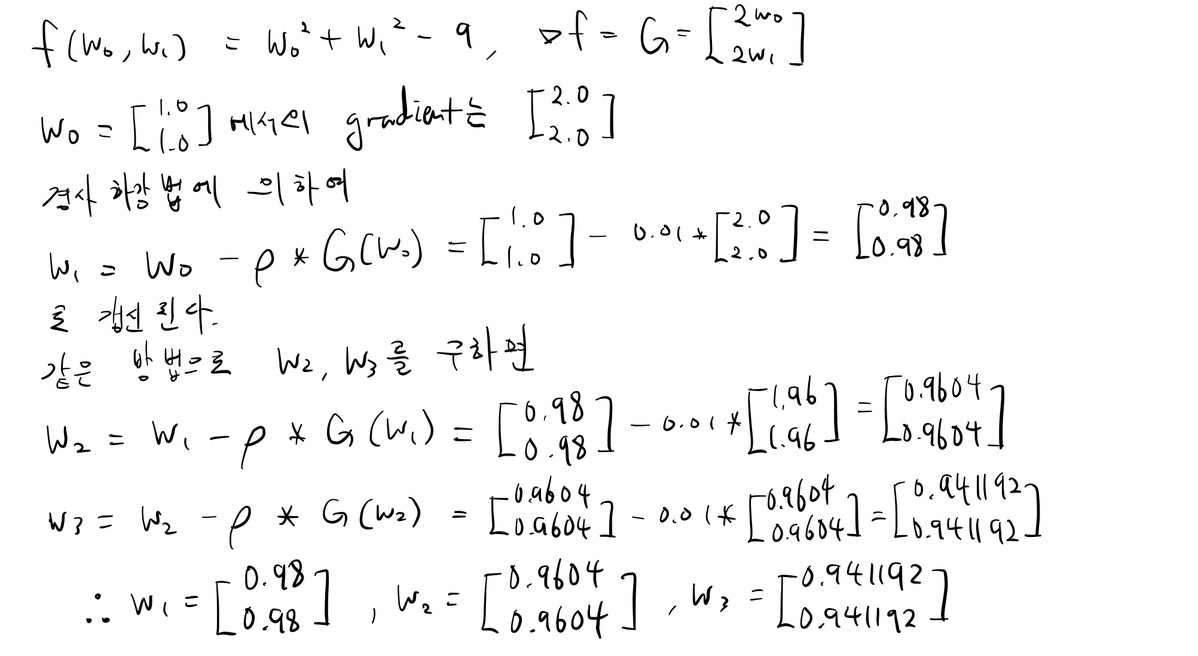

#### (3) (2)의 경사 하강법이 (1)에서 구한 최소점을 향해 이동하는지 확인하세요.

w0 = (1,1)에서 시작한 값이 (1)에서 구한 최소점인 (0,0)으로 점차 향하는 것을 확인할 수 있다.

#### (4) (2)의 과정을 Python을 활용하여 구하고, 비교하세요. (구현 코드 첨부)

In [58]:
# 소수 6번째자리까지 출력
torch.set_printoptions(precision=6)

# 초기값 = (1,1)
w = torch.tensor([1.0, 1.0], dtype=torch.float)
# learning rate = 0.01
lr = 0.01

# w1,w2,w3를 구하기 위해 3번 순회
for epoch in range(3):
    # grad 추적
    w.requires_grad_(True)
    # function 구현 
    f = w[0]**2 + w[1]**2 - 9
    
    # gradient구하기 위해 backward 실행
    f.backward()
    with torch.no_grad() as grd:
        # gradient descent
        w = w - lr * w.grad
        print(w)

# 출력한 결과가 앞에서 구한 w1,w2,w3와 동일한 것을 확인할 수 있음

tensor([0.980000, 0.980000])
tensor([0.960400, 0.960400])
tensor([0.941192, 0.941192])


### 9. [퍼셉트론] 다음 그림의 퍼셉트론 (perceptron) 입니다. (10점)

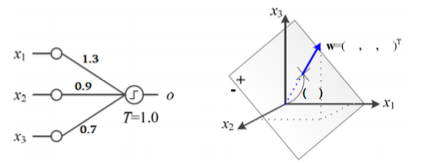

#### (1) 해당 퍼셉트론에 의해 결정되는 결정평면의 방향과 원점에서의 거리를 구하세요.

해당 퍼셉트론에 의해 activate 되려면
$$ 1.3x_1 + 0.9x_2 + 0.7x_3$$
가 1보다 커야 한다.

즉 퍼셉트론의 결정 평면은
$$ 1.3x_1 + 0.9x_2 + 0.7x_3 - 1 = 0$$
이며 이 값이 0보다 클 경우 activate, 작을 경우 deactivate 된다.

결정 평면의 법선 벡터는 (1.3, 0.9, 0.7)이므로 결정 평면의 방향은 (1.3, 0.9, 0.7)이다.

원점에서의 거리는 평면과 점 사이의 거리 공식인
$$ \frac{|ax_1 + bx_2 + cx_3 + d|}{\sqrt{a^2 + b^2 + c^2}} $$
에 따라
$$ \frac{|1.3*0 + 0.9*0 + 0.7*0 - 1|}{\sqrt{1.3^2 + 0.9^2 + 0.7^2}}$$
이다.


In [59]:
import math

print(1 / math.sqrt(1.3**2 + 0.9**2 + 0.7**2))

0.5783149319662402


#### (2) T=2.0, T=0.0으로 바꾸기 위해 퍼셉트론을 수정하고, 결정평면의 변화를 설명하세요.

결정평면은 각각
$$ T = 2.0, \quad 1.3x_1 + 0.9x_2 + 0.7x_3 - 2 = 0$$
$$ T = 0.0, \quad 1.3x_1 + 0.9x_2 + 0.7x_3 - 0 = 0$$

### 10. [PLA] PLA 가중치 갱신 법칙 𝑤(𝑡+1)=𝑤(𝑡)+𝑦(𝑡)𝑥(𝑡)를 보고 다음 문제의 답을 보이세요. (20점)


#### (1) 𝑦(𝑡)𝑤𝑇(𝑡)𝑥(𝑡) < 0임을 보이세요. (Hint: 𝑥(𝑡)는 𝑤(𝑡)에 의해 오분류 됨)

perceptron에서는 $w^T(t)x(t)$ 연산을 진행하고 이 값의 부호에 따라 +면 1, -면 -1으로 예측한다.

따라서 다음과 같이 prediction $\hat{y}(t)$는 다음과 같이 정의할 수 있다.
$$ \hat{y}(t) = sign(w^T(t)x(t)) $$

$x(t)$는 $w(t)$에 의해 오분류 되었다는 것은 예측값 $\hat{y}(t)$가 실제값 $y(t)$와 다르다는 것을 의미하며, 즉 $w^T(t)x(t)$의 부호와 $y(t)$가 다르다는 것을 뜻한다.

$$=> y(t)w^T(t)x(t) < 0$$

#### (2) 𝑦(𝑡)𝑤𝑇(𝑡 + 1)𝑥(𝑡) > 𝑦(𝑡)𝑤𝑇(𝑡) 𝑥(𝑡) 임을 보이세요. (Hint: 𝑤(𝑡 + 1) = 𝑤(𝑡) + 𝑦(𝑡)𝑥(𝑡) 이용)

$$y(t)w^T(t+1)x(t) = y(t)(w(t) + y(t)x(t))^Tx(t) = y(t)w^T(t)x(t) + y(t)y^T(t)x^T(t)x(t) = y(t)w^T(t)x(t) + x^T(t)x(t)$$
$x^T(t)x(t)$는 항상 0보다 크므로 
$$y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$$

#### (3) 𝑤(𝑡)에서 𝑤(𝑡 + 1)로 이동하는 것이 𝑥(𝑡)를 분류하는데 올바른 방향으로 이동함을 설명하세요.

$w$와 $x$를 각각 벡터로 본다면 $w^Tx = w•x = |w||x|cos\theta$로 표현할 수 있다.

어차피 부호만 중요하기 때문에 $|w||x|$는 항상 양수이므로 제외하고 결국 두 벡터 사이의 각도에 따라 $\hat{y}$가 결정된다.

실제값 y가 1일 때 잘못 했다고 했을 경우에는 $cos\theta$가 0보다 작았을 것이고, 즉 두 벡터 사이의 각도가 90도 이상이라는 것이다.

$w(t+1)$은 $w(t)$에 $y(t)x(t)$만큼 더해주는데 $y(t)=1$이므로 $w(t+1) = w(t) + x(t)$로 갱신된다.

갱신된 w와 x 사이의 각도를 $\theta_{new}$라고 할 경우, $cos\theta_{new}$는 $w^T(t+1)x(t)$와 부호가 같으므로

$$cos\theta_{new} \propto w^T(t+1)x(t) \propto (w(t) + x(t))^Tx(t) \propto w^T(t)x(t) + x^T(t)x(t) \propto cos\theta + x^T(t)x(t)$$
$$ x^T(t)x(t) > 0 \quad i.e.\; cos\theta_{new} > cos\theta $$

$cos\theta$가 커지는 방향으로 학습 되기 때문에 이전보다 $x(t)$를 맞게 예측하는 방향으로 학습 된다고 할 수 있다.

실제값 y가 -1인 경우에도 마찬가지의 방식으로 학습된다.

따라서 $w(t)$가 $w(t+1)$로 이동하는 것이 $x(t)$를 분류하는데 올바른 방향으로 이동함을 알 수 있다.

#### (4) 𝐰 = [w0,w1,w2]T이고, 𝐱 = [1,x1,x2]T인 h(𝑥) = sign(𝐰T𝐱) 일 때, h(𝐱) = −1와 h(𝐱) = 1는 결정 직선 x2 =ax1 +𝑏 에 의해 구분된다. 결정 직선의 기울기 a와 절편 b를 가중치 w0,w1,w2에 의해 설명하세요.

직선 $x_2 = ax_1 + b$는 $$b*1 + a*x_1 - 1*x_2 = 0$$로 볼 수 있다.
마찬가지로 h(x)의 값은 $w^Tx$의 부호에 의해 결정되는 데, 

즉$ w_0*1 + w_1*x_1 + w_2*x_2$의 부호에 의해 결정된다는 것이고 

따라서 h(x)의 결정직선은
$$ w_0*1 + w_1*x_1 + w_2*x_2 = 0$$
으로 볼 수 있다.

이를 바꿔 표현하면
$$ -\frac{w_0}{w_2}*1 - \frac{w_1}{w_2}*x_1 - 1*x_2 = 0$$
$$ i.e.\; a = - \frac{w_1}{w_2}, b = -\frac{w_0}{w_2}$$